# Cleaned data



77077
223076


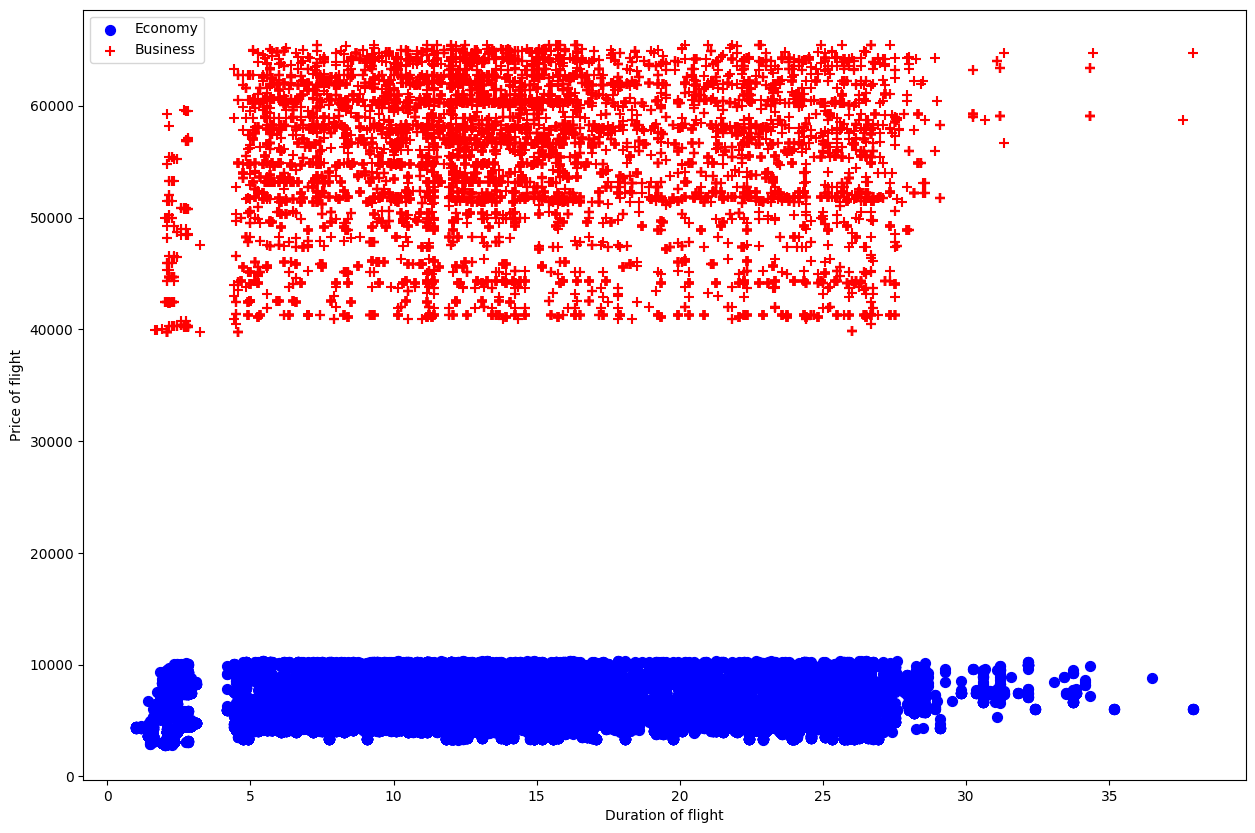

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv("flight.csv")
df


df.drop(["Unnamed: 0","flight"],axis="columns",inplace=True)
df


df.price.describe()

### Outlier detection and removal

def remove_outliers(df, s):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby(s):
        m = np.mean(subdf.price)
        st = np.std(subdf.price)
        reduced_df = subdf[(subdf.price > (m - st)) & (subdf.price <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df1=remove_outliers(df,"airline")

# print(len(df))
# print(len(df1))

# reduction=len(df)-len(df1)
# print(reduction)

df2=remove_outliers(df,"class")


reduction=len(df)-len(df2)
print(reduction)

print(len(df2))

final=df2

final.shape

final.describe()

import matplotlib 
def plot_scatter_chart(final,airline):
    eco=final[(final.airline==airline) & (final["class"]=="Economy")]
    busi=final[(final.airline==airline) & (final["class"]=="Business")]
    matplotlib.rcParams["figure.figsize"]=(15,10)
    plt.scatter(eco.duration,eco.price,color="blue",label="Economy",s=50)
    plt.scatter(busi.duration,busi.price,color="red",marker="+",label="Business",s=50)
    
    plt.xlabel("Duration of flight")
    plt.ylabel("Price of flight")
    plt.legend()
    plt.show()
    
plot_scatter_chart(final,"Vistara")

In [8]:
final

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Air_India,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220
1,Air_India,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450
2,Air_India,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690
3,Vistara,Delhi,Evening,zero,Night,Mumbai,Business,2.17,1,50264
4,Air_India,Delhi,Night,one,Afternoon,Mumbai,Business,17.75,1,50669
...,...,...,...,...,...,...,...,...,...,...
223071,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697
223072,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709
223073,Vistara,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640
223074,Vistara,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640


# EXPLORATORY DATA ANALYSIS

In [3]:
print("Summary Statistics of Price:")
print(final['price'].describe())
print()


Summary Statistics of Price:
count    223076.000000
mean      20029.357111
std       22116.212370
min        2832.000000
25%        4792.000000
50%        6461.000000
75%       45693.000000
max       65506.000000
Name: price, dtype: float64



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

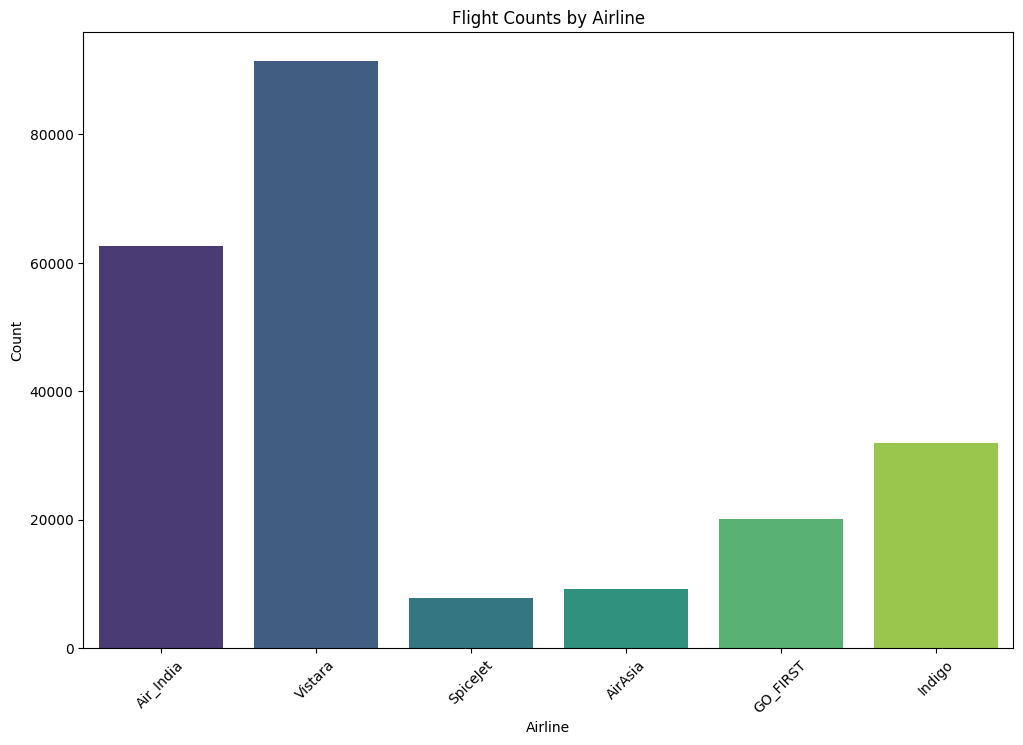

In [5]:
plt.figure(figsize=(12, 8))
sns.countplot(x='airline', data=final, palette='viridis')
plt.title('Flight Counts by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


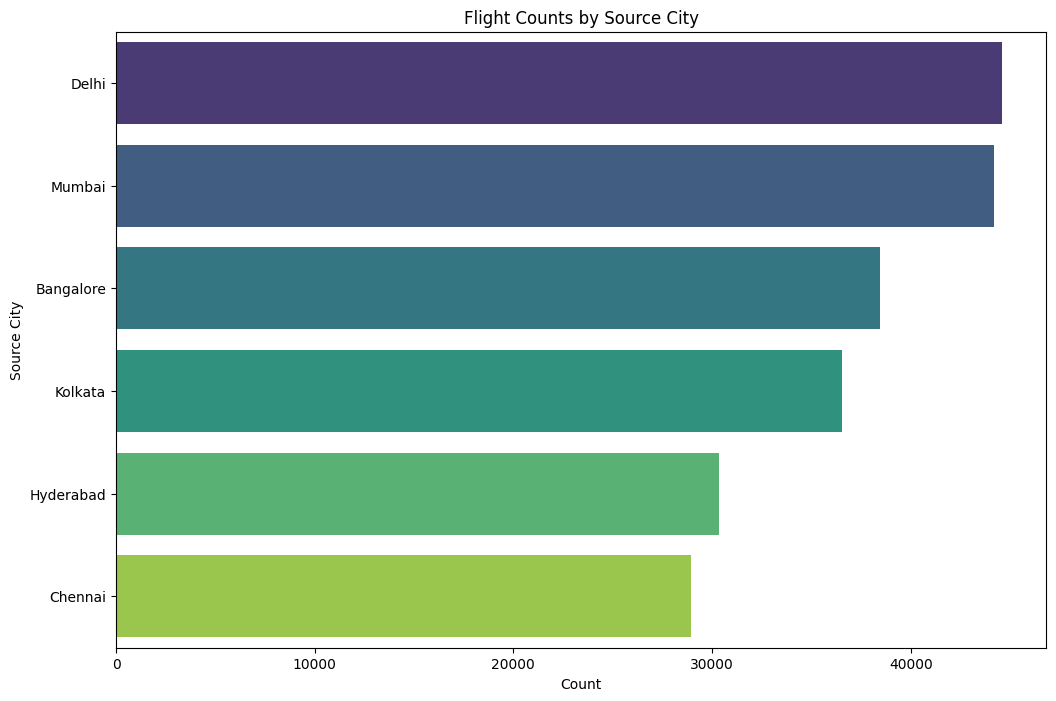

In [6]:
plt.figure(figsize=(12, 8))
sns.countplot(y='source_city', data=final, palette='viridis', order=final['source_city'].value_counts().index)
plt.title('Flight Counts by Source City')
plt.xlabel('Count')
plt.ylabel('Source City')
plt.show()

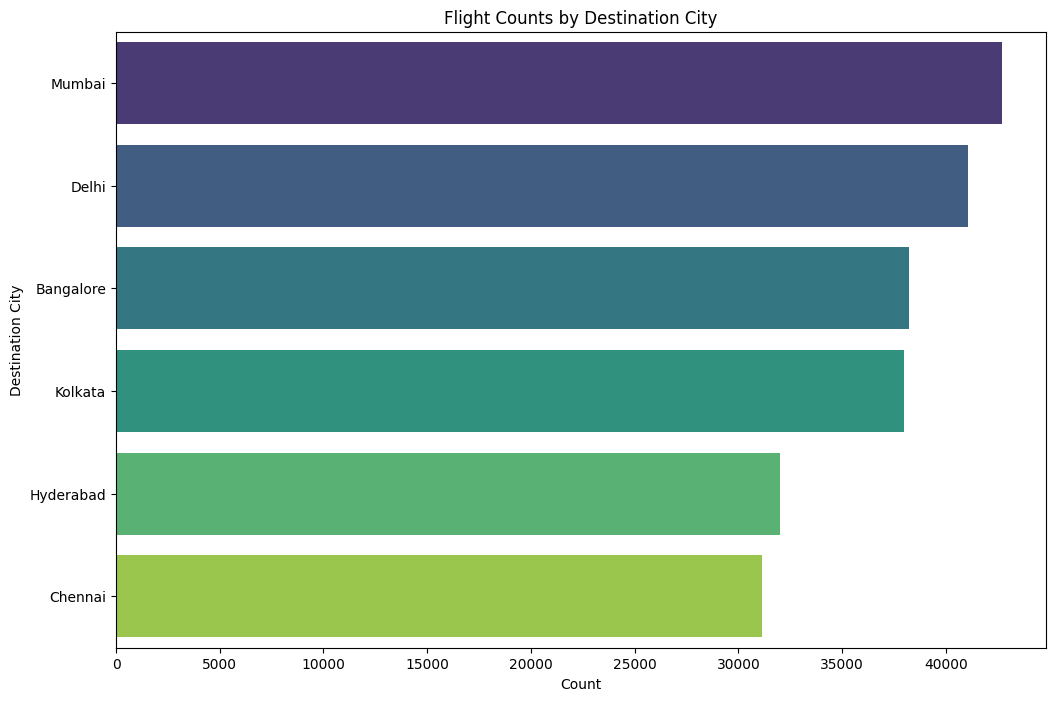

In [7]:
plt.figure(figsize=(12, 8))
sns.countplot(y='destination_city', data=final, palette='viridis', order=final['destination_city'].value_counts().index)
plt.title('Flight Counts by Destination City')
plt.xlabel('Count')
plt.ylabel('Destination City')
plt.show()


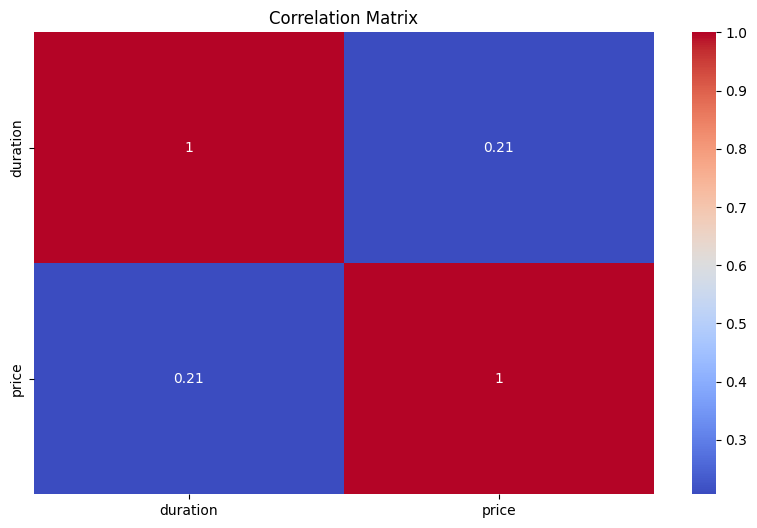

In [8]:
corr_matrix = final[["duration","price"]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

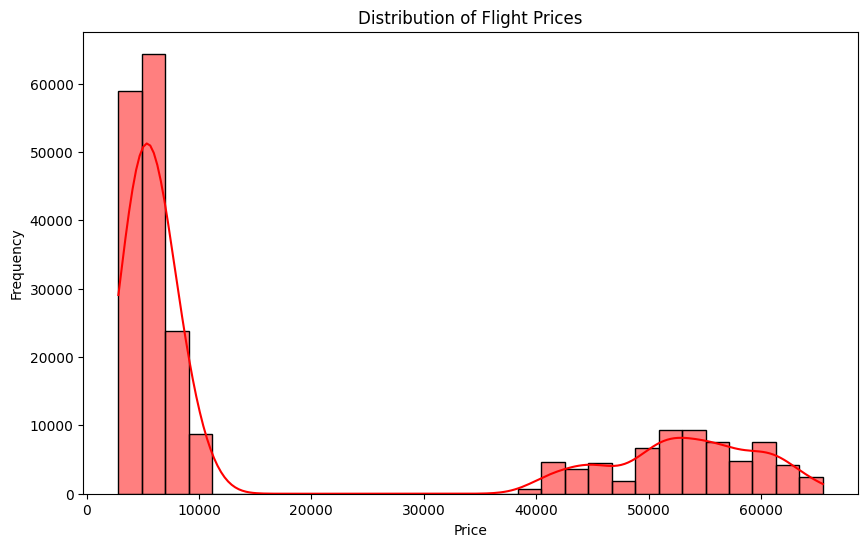

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(final['price'], bins=30, kde=True, color='red')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

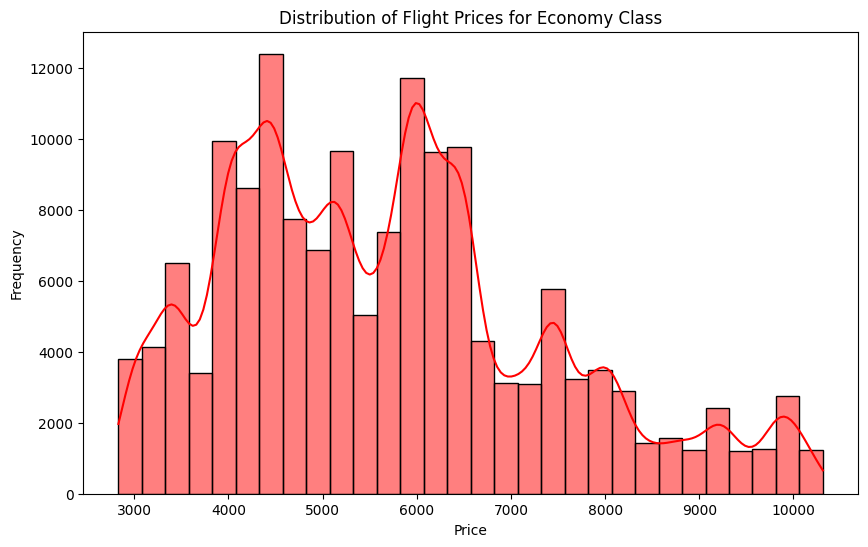

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(final[final['class'] == "Economy"], x='price', bins=30, kde=True, color='red')
plt.title('Distribution of Flight Prices for Economy Class')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


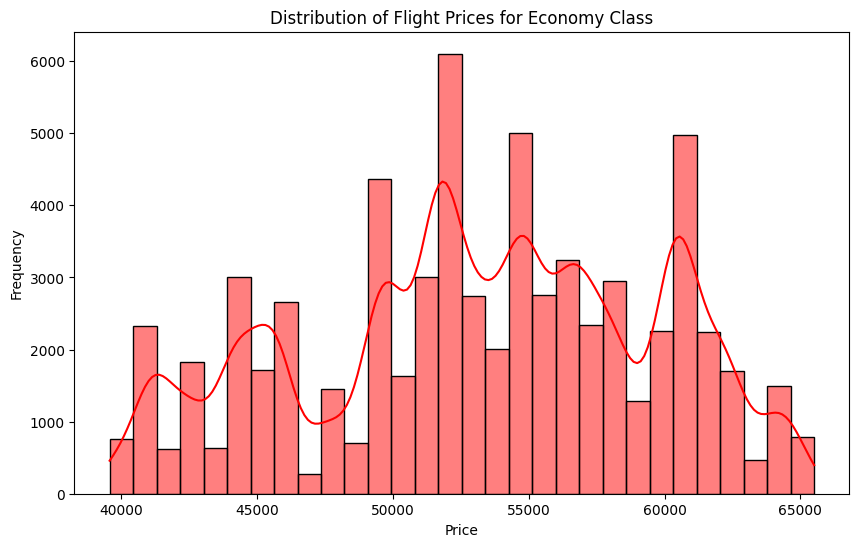

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(final[final['class'] == "Business"], x='price', bins=30, kde=True, color='red')
plt.title('Distribution of Flight Prices for Economy Class')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


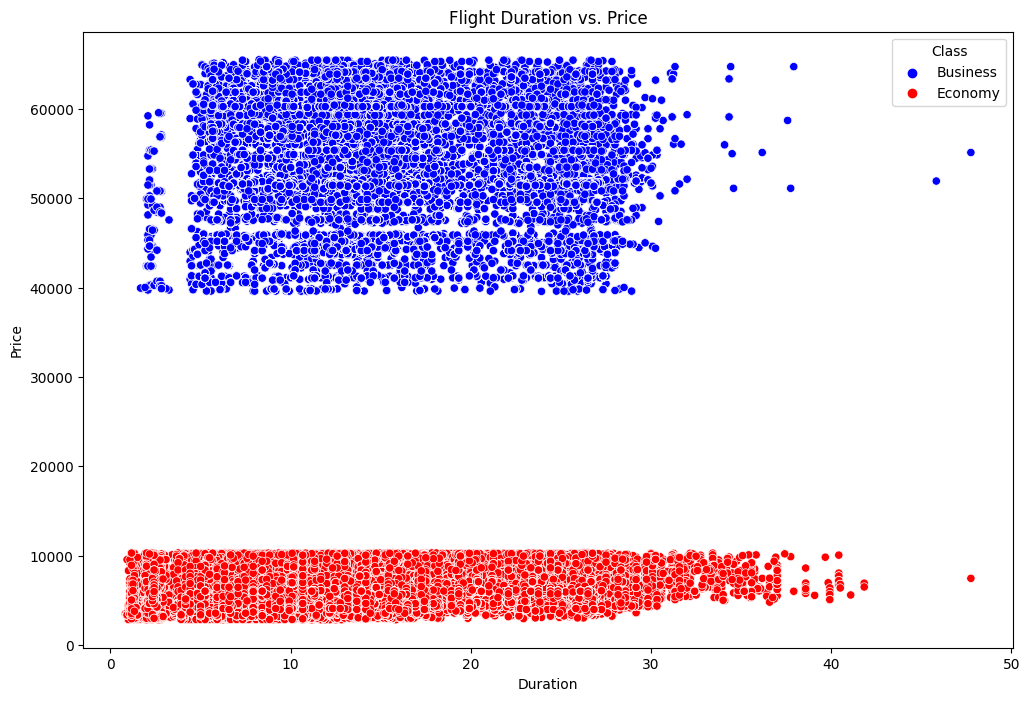

In [12]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='duration', y='price', data=final, hue='class', palette=['blue', 'red'])
plt.title('Flight Duration vs. Price')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.legend(title='Class')
plt.show()

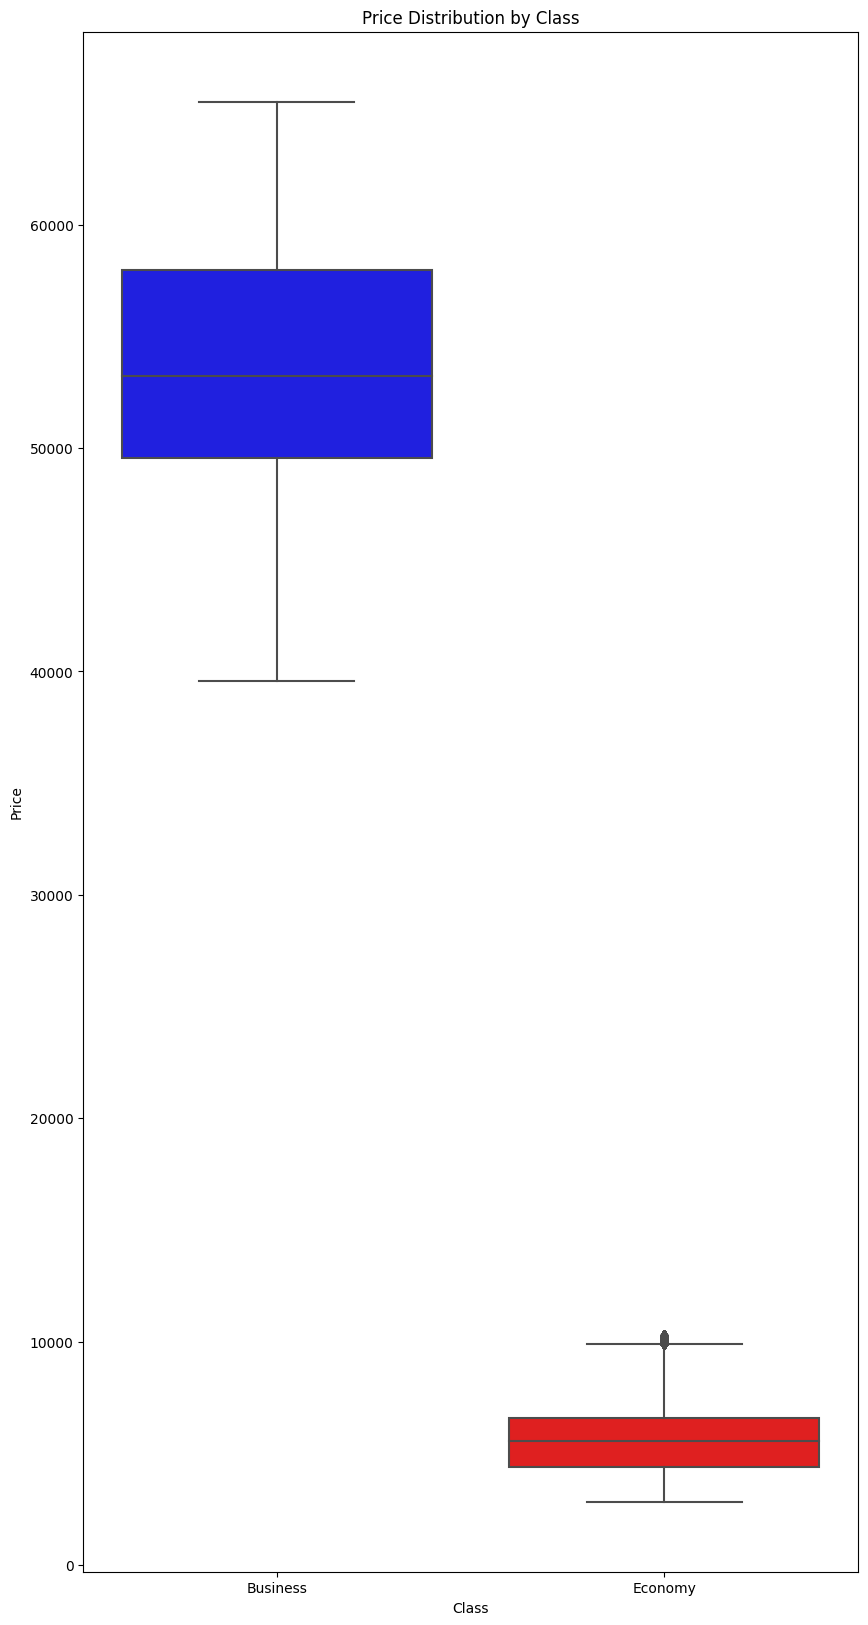

In [13]:
plt.figure(figsize=(10, 20))
sns.boxplot(x='class', y='price', data=final, palette=['blue', 'red'])
plt.title('Price Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Price')
plt.show()

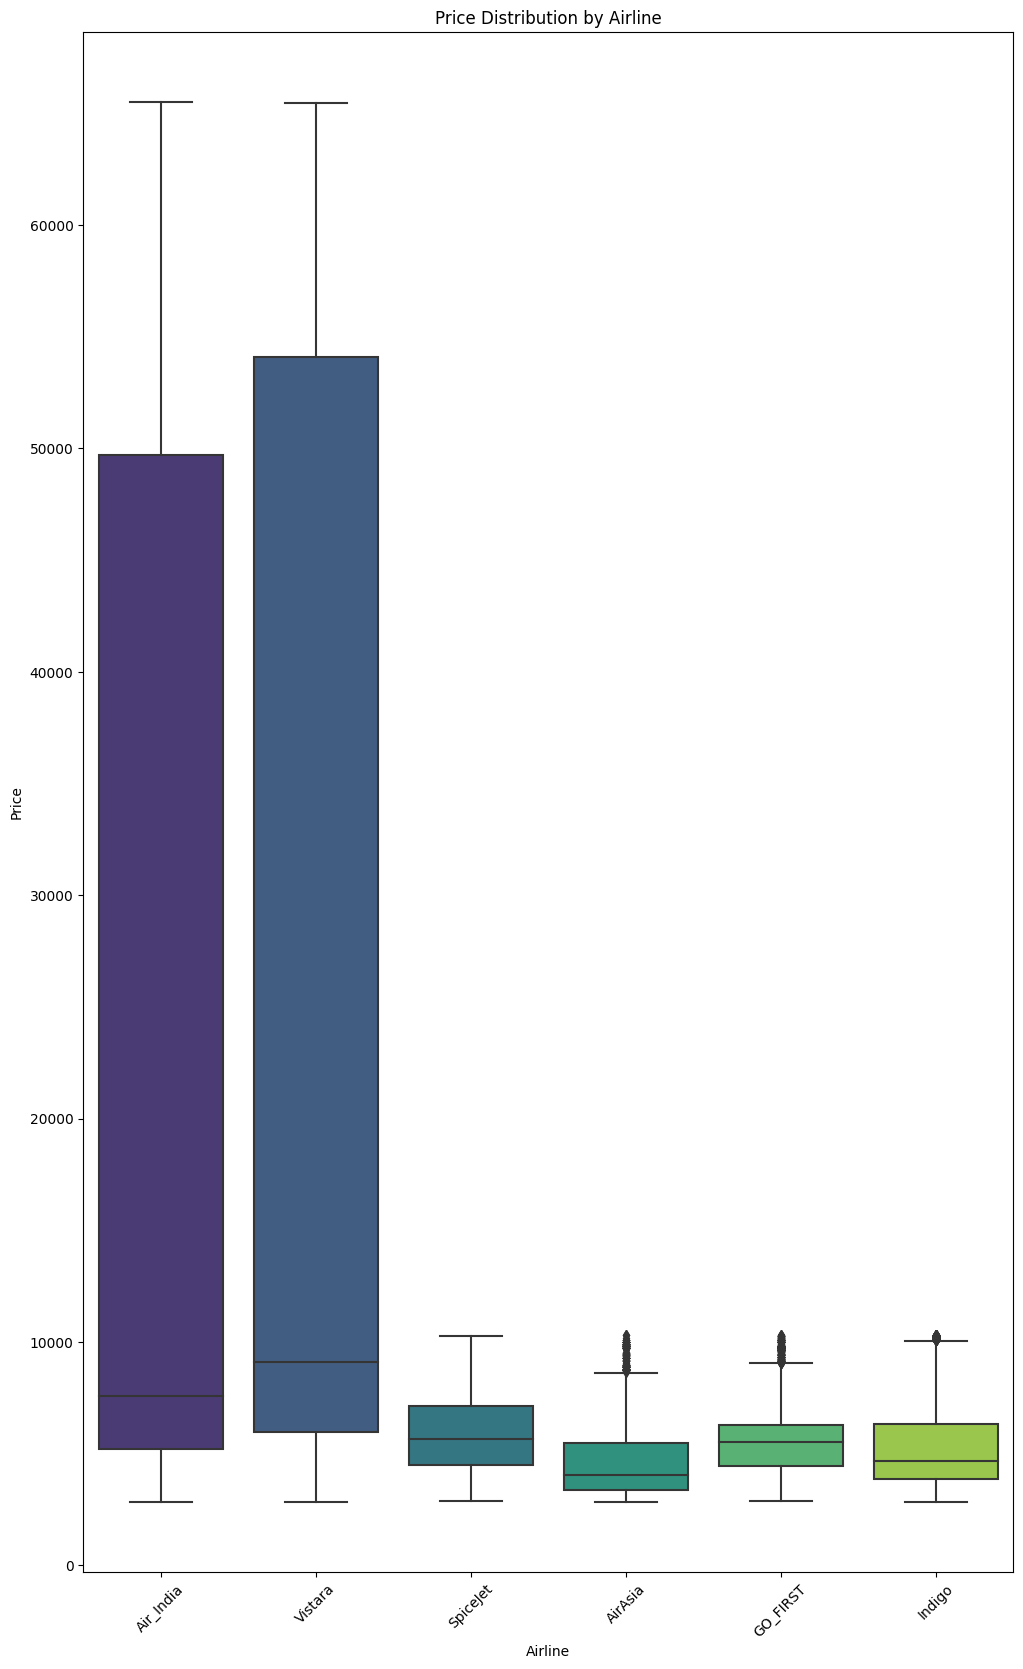

In [14]:
plt.figure(figsize=(12, 20))
sns.boxplot(x='airline', y='price', data=final, palette='viridis')
plt.title('Price Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

C:\Users\SOHAM CHATTERJEE\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\SOHAM CHATTERJEE\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\SOHAM CHATTERJEE\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\SOHAM CHATTERJEE\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\SOHAM CHATTERJEE\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigne

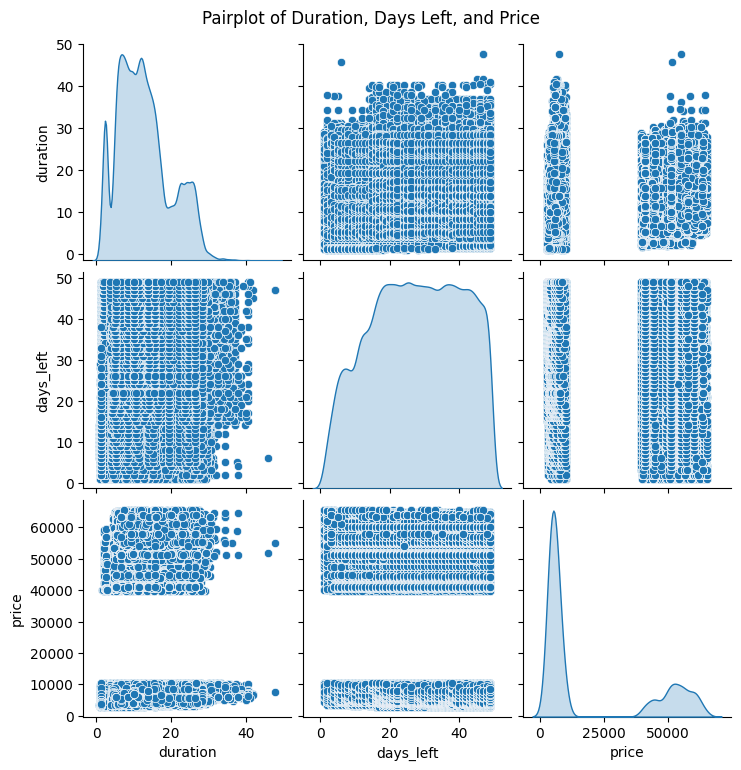

In [15]:
sns.pairplot(final[['duration', 'days_left', 'price']], diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of Duration, Days Left, and Price', y=1.02)
plt.show()

In [16]:
# sns.set(style='ticks')
# sns.pairplot(final, hue='class', palette={'Economy': 'blue', 'Business': 'red'})
# plt.suptitle('Scatter Plot Matrix', y=1.02)
# plt.show()

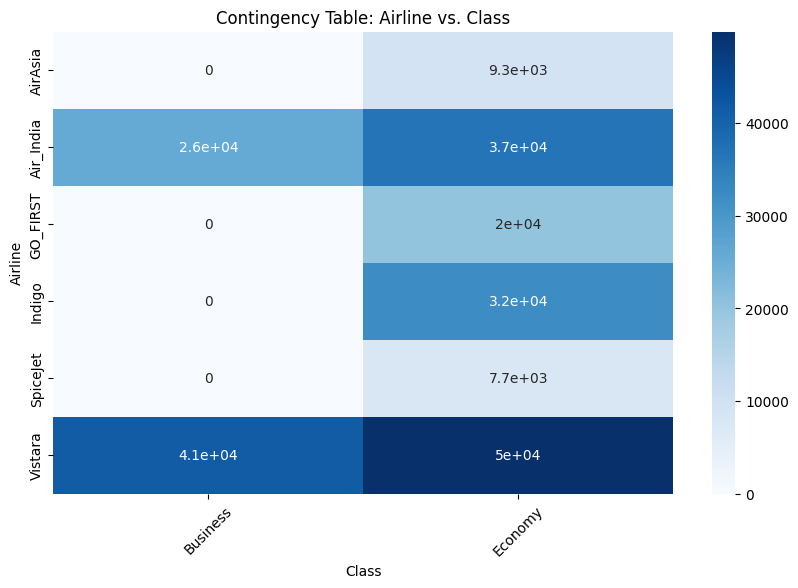

In [17]:
contingency_table = pd.crosstab(final['airline'], final['class'])

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues')
plt.title('Contingency Table: Airline vs. Class')
plt.xlabel('Class')
plt.ylabel('Airline')
plt.xticks(rotation=45)
plt.show()

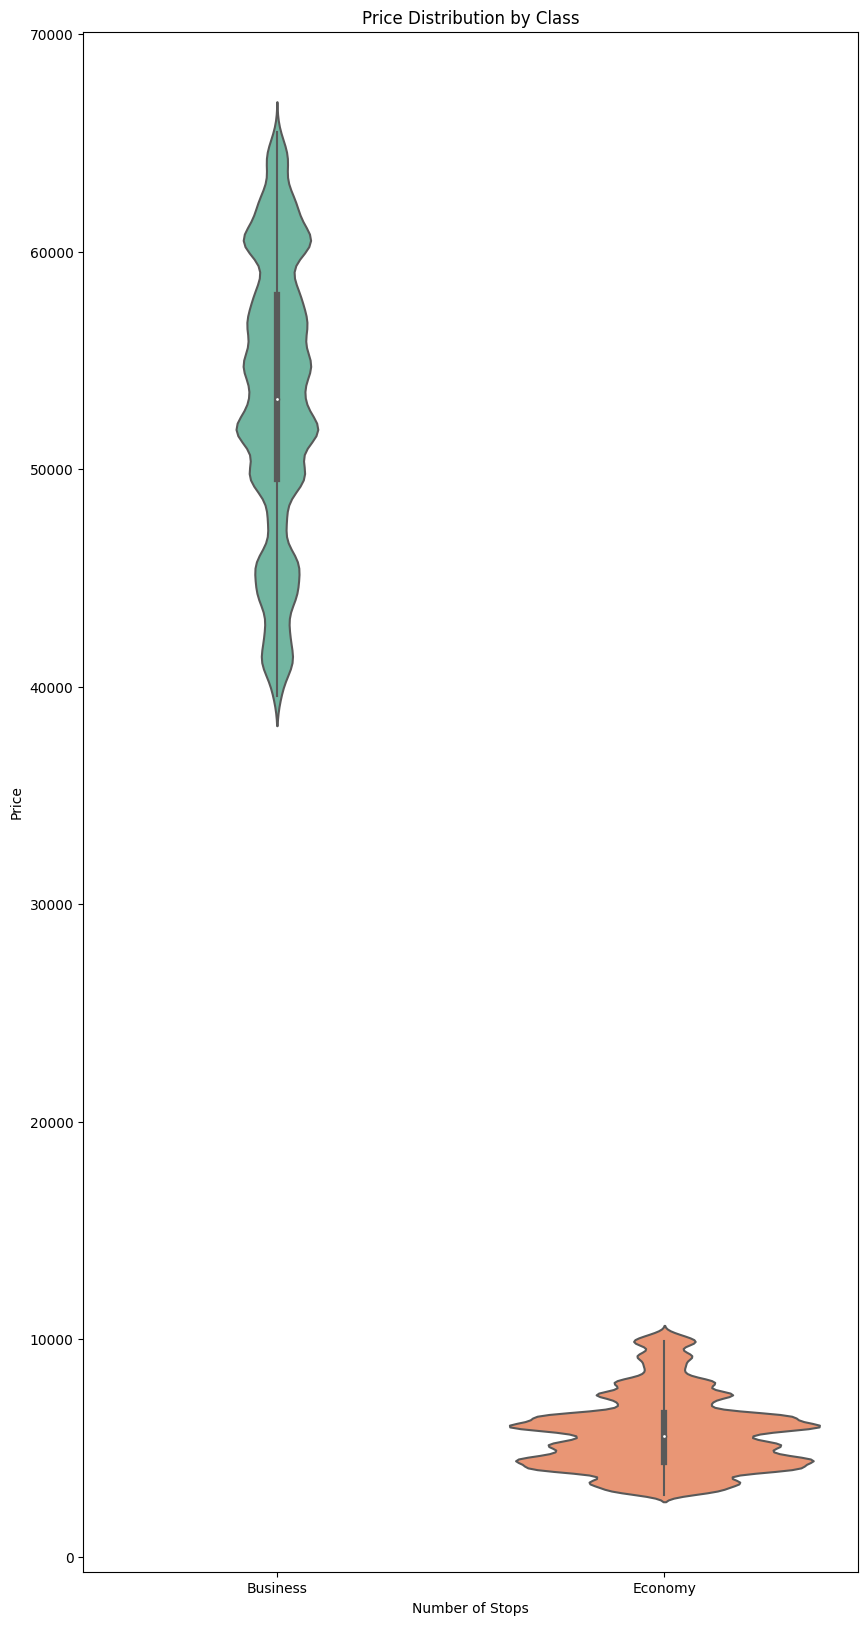

In [18]:
plt.figure(figsize=(10,20))
sns.violinplot(x='class', y='price', data=final, palette='Set2')
plt.title('Price Distribution by Class')
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.show()

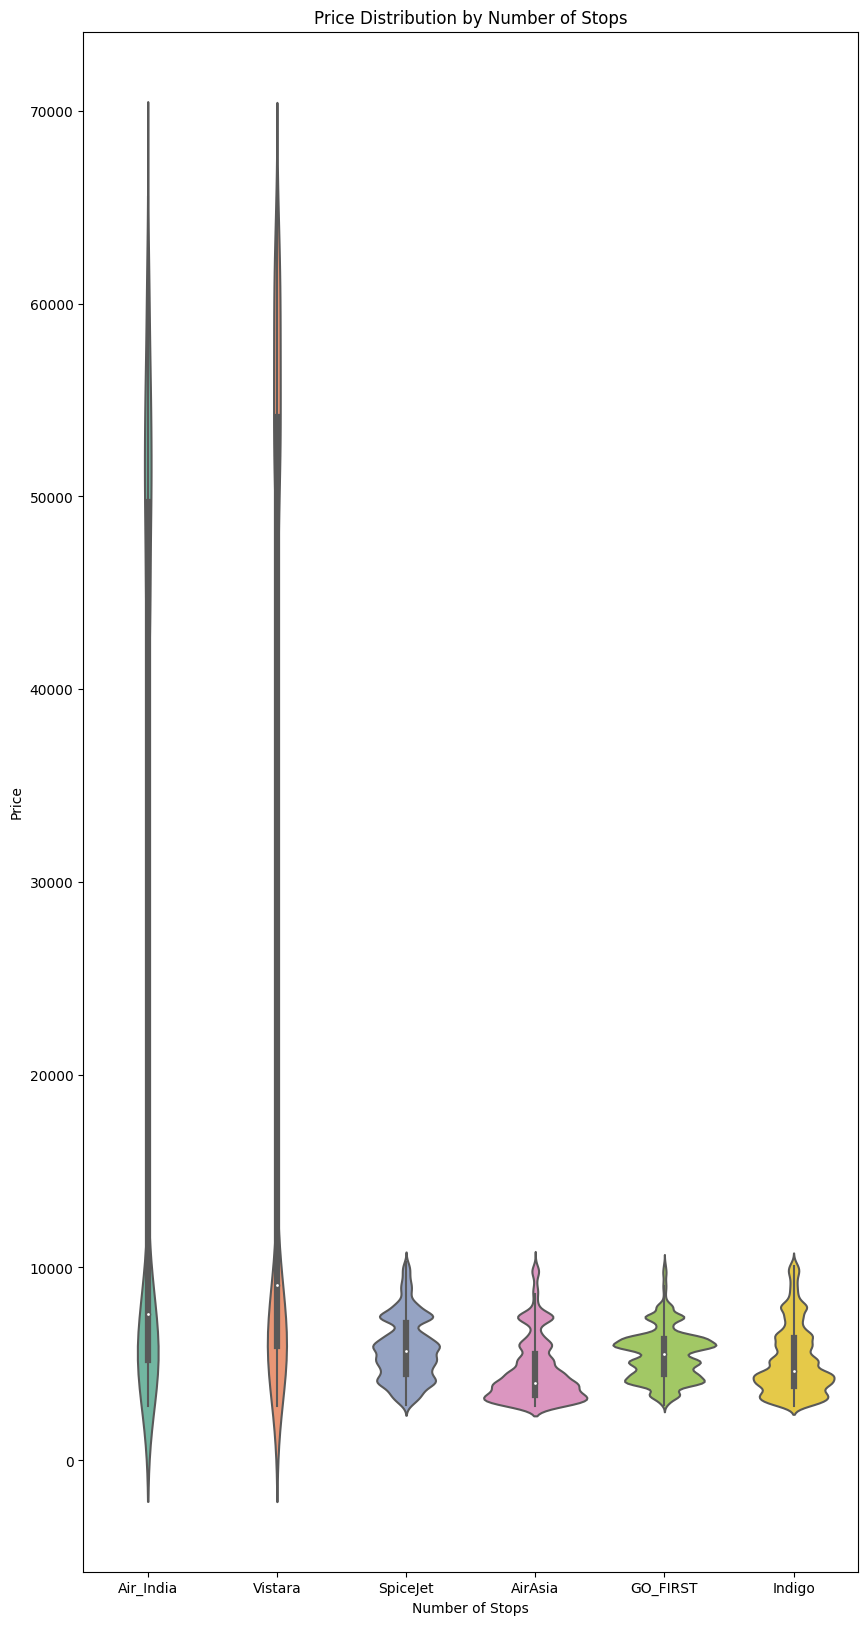

In [19]:
plt.figure(figsize=(10,20))
sns.violinplot(x='airline', y='price', data=final, palette='Set2')
plt.title('Price Distribution by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.show()

C:\Users\SOHAM CHATTERJEE\AppData\Local\Temp\ipykernel_1656\1590712578.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='source_city', y='price', data=final, palette='viridis', ci=None)


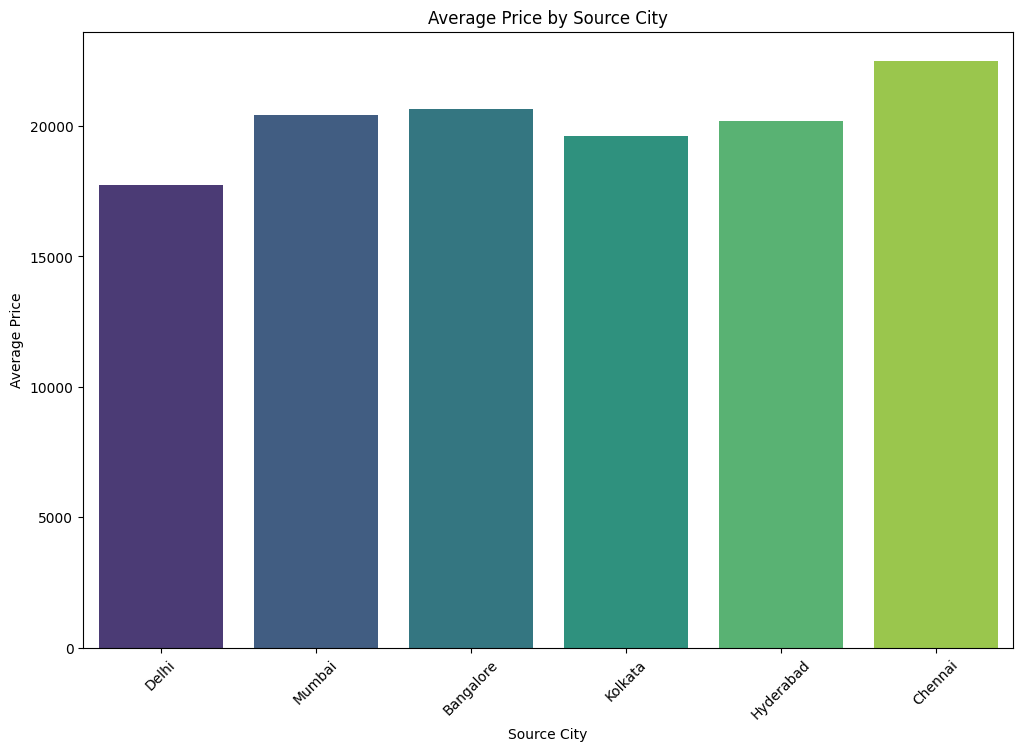

In [20]:
plt.figure(figsize=(12, 8))
sns.barplot(x='source_city', y='price', data=final, palette='viridis', ci=None)
plt.title('Average Price by Source City')
plt.xlabel('Source City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


C:\Users\SOHAM CHATTERJEE\AppData\Local\Temp\ipykernel_1656\3736145775.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='destination_city', y='price', data=final, palette='viridis', ci=None)


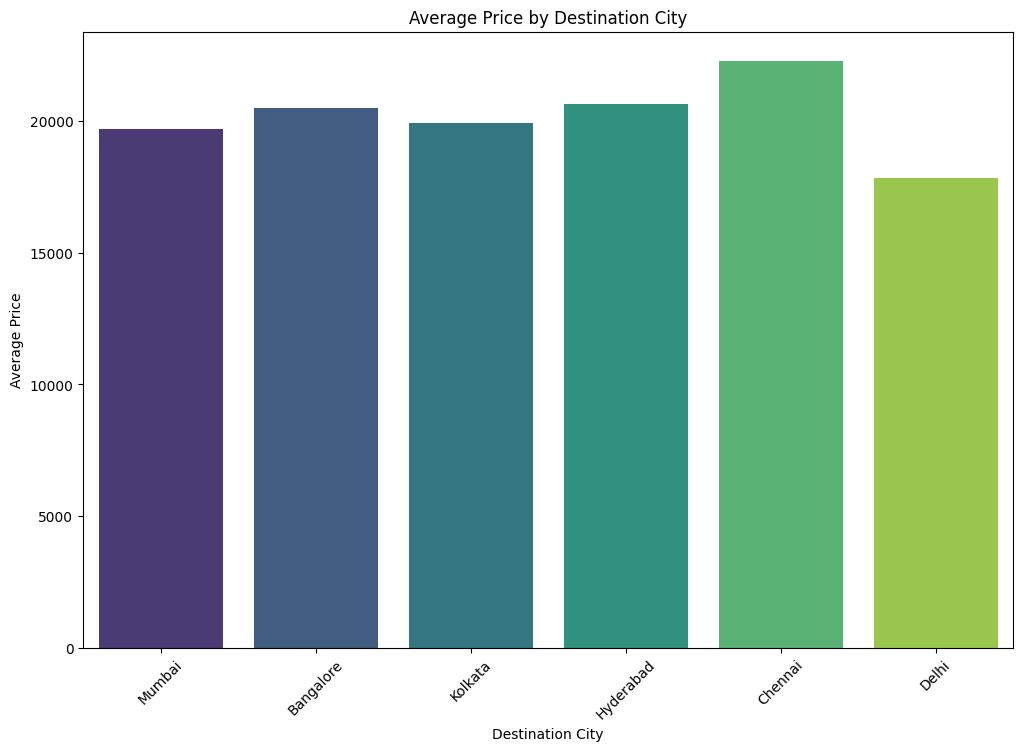

In [21]:
plt.figure(figsize=(12, 8))
sns.barplot(x='destination_city', y='price', data=final, palette='viridis', ci=None)
plt.title('Average Price by Destination City')
plt.xlabel('Destination City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

C:\Users\SOHAM CHATTERJEE\AppData\Local\Temp\ipykernel_1656\1749333650.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="airline", y='price', data=final, palette='viridis', ci=None)


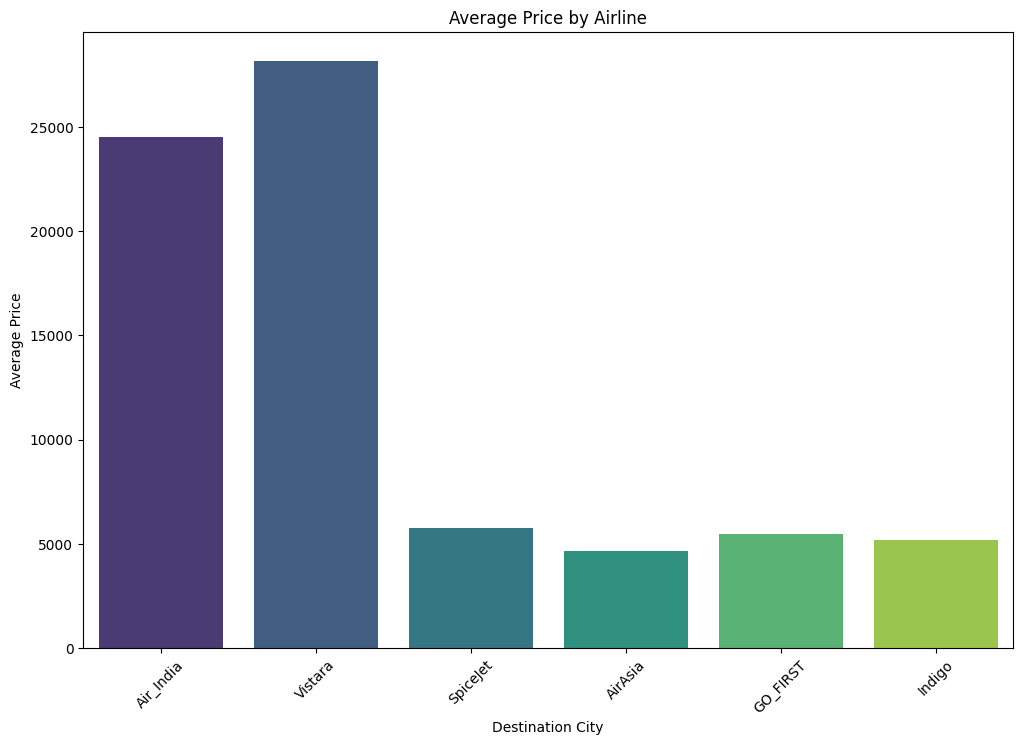

In [22]:
plt.figure(figsize=(12, 8))
sns.barplot(x="airline", y='price', data=final, palette='viridis', ci=None)
plt.title('Average Price by Airline')
plt.xlabel('Destination City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

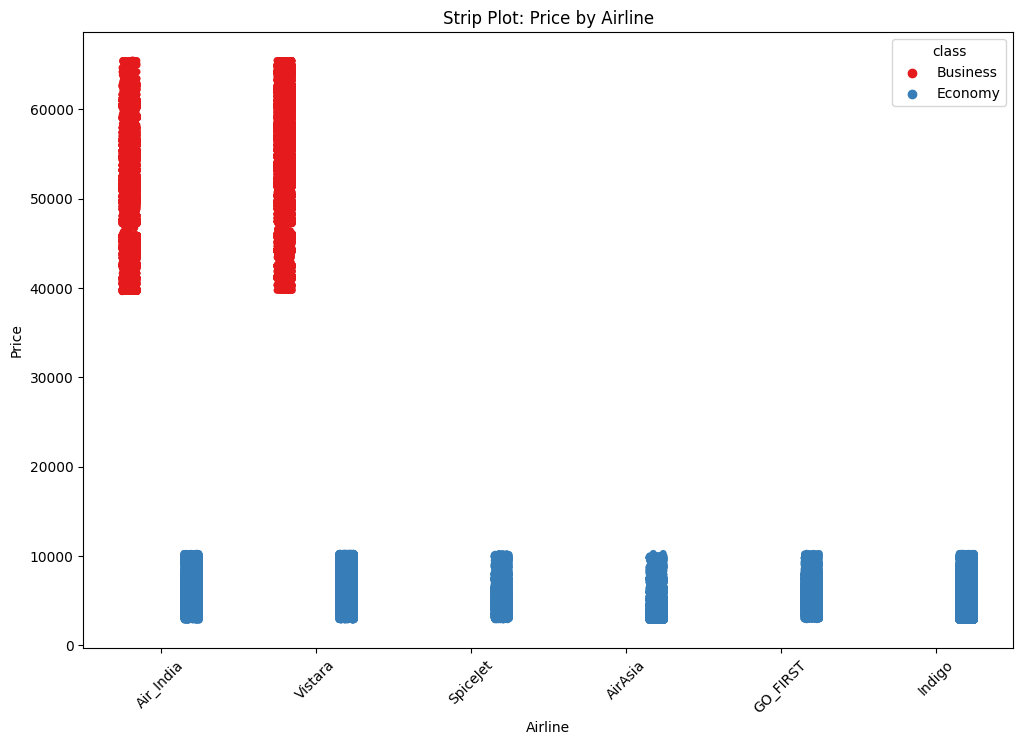

In [23]:
plt.figure(figsize=(12, 8))
sns.stripplot(x='airline', y='price', data=final, hue='class', jitter=True, dodge=True, palette='Set1')
plt.title('Strip Plot: Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


C:\Users\SOHAM CHATTERJEE\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


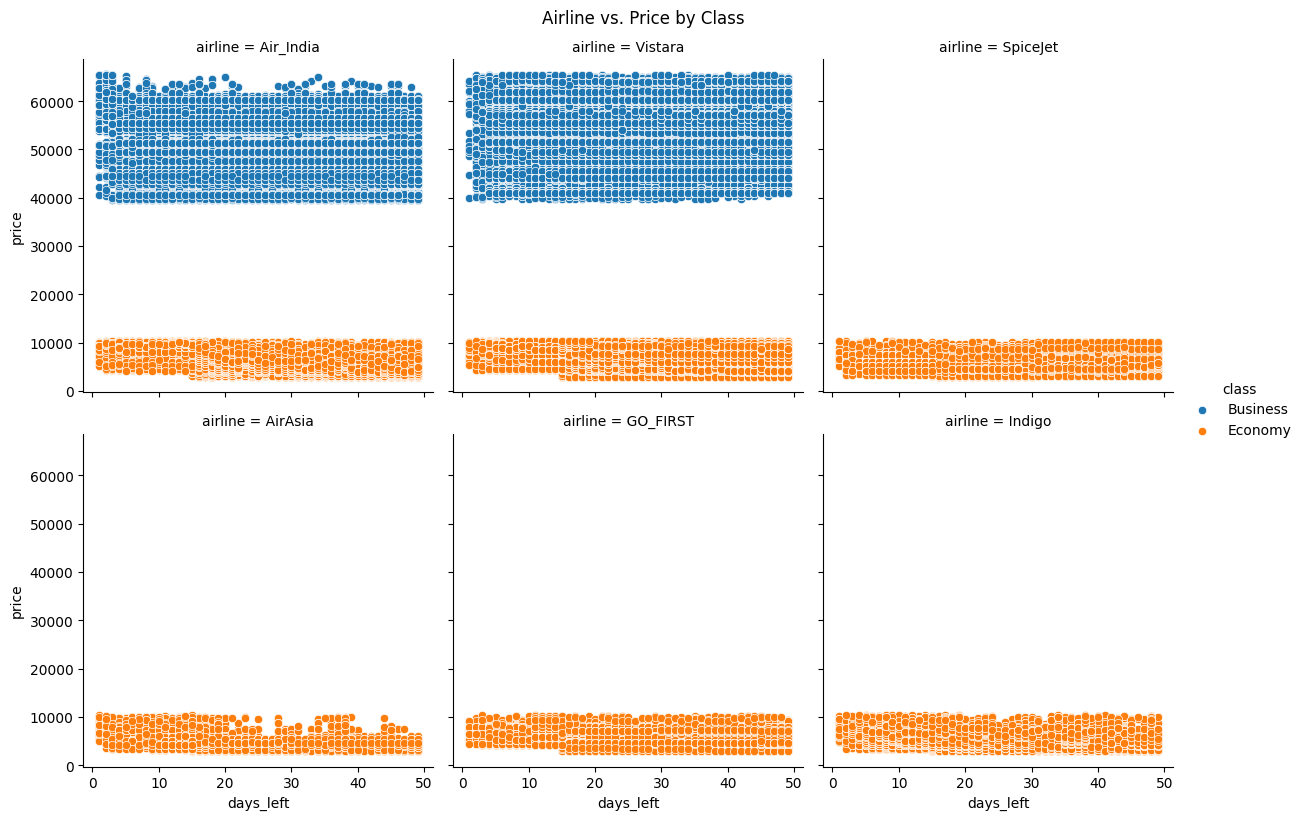

In [24]:
g = sns.FacetGrid(final, col='airline', hue='class', col_wrap=3, height=4)
g.map(sns.scatterplot, 'days_left', 'price')
g.add_legend()
plt.suptitle('Airline vs. Price by Class', y=1.02)
plt.show()

In [25]:
# !pip install sweetviz

In [26]:
import sweetviz
report=sweetviz.analyze(final)

                                             |                                             | [  0%]   00:00 ->…

In [27]:
report

In [28]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [29]:
rep2=sweetviz.analyze([final,"Flight Price Data"],target_feat="price")

                                             |                                             | [  0%]   00:00 ->…

In [30]:
rep2.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Modelling

### Encoding categorical variables

In [9]:
dummies_a=pd.get_dummies(final.airline).astype(int)
dummies_a.head(3)

final2=pd.concat([final,dummies_a.drop("Vistara",axis="columns")],axis="columns")
final2

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet
0,Air_India,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220,0,1,0,0,0
1,Air_India,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450,0,1,0,0,0
2,Air_India,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690,0,1,0,0,0
3,Vistara,Delhi,Evening,zero,Night,Mumbai,Business,2.17,1,50264,0,0,0,0,0
4,Air_India,Delhi,Night,one,Afternoon,Mumbai,Business,17.75,1,50669,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223071,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697,0,0,0,0,0
223072,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709,0,0,0,0,0
223073,Vistara,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640,0,0,0,0,0
223074,Vistara,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640,0,0,0,0,0


In [10]:
dummies_b=pd.get_dummies(final.source_city).astype(int)
dummies_b.columns = ["Bangalore_s","Chennai_s","Delhi_s","Hyderabad_s","Kolkata_s","Mumbai_s"]

dummies_b.head(3)

,Bangalore_s,Chennai_s,Delhi_s,Hyderabad_s,Kolkata_s,Mumbai_s
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0


In [11]:
final3=pd.concat([final2,dummies_b.drop("Delhi_s",axis="columns")],axis="columns")
final3

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Bangalore_s,Chennai_s,Hyderabad_s,Kolkata_s,Mumbai_s
0,Air_India,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220,0,1,0,0,0,0,0,0,0,0
1,Air_India,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450,0,1,0,0,0,0,0,0,0,0
2,Air_India,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690,0,1,0,0,0,0,0,0,0,0
3,Vistara,Delhi,Evening,zero,Night,Mumbai,Business,2.17,1,50264,0,0,0,0,0,0,0,0,0,0
4,Air_India,Delhi,Night,one,Afternoon,Mumbai,Business,17.75,1,50669,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223071,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697,0,0,0,0,0,0,1,0,0,0
223072,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709,0,0,0,0,0,0,1,0,0,0
223073,Vistara,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640,0,0,0,0,0,0,1,0,0,0
223074,Vistara,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640,0,0,0,0,0,0,1,0,0,0


In [12]:
dummies_c=pd.get_dummies(final.destination_city).astype(int)
dummies_c.columns = ["Bangalore_d","Chennai_d","Delhi_d","Hyderabad_d","Kolkata_d","Mumbai_d"]

dummies_c.head(3)


,Bangalore_d,Chennai_d,Delhi_d,Hyderabad_d,Kolkata_d,Mumbai_d
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1


In [13]:
final4=pd.concat([final3,dummies_c.drop("Delhi_d",axis="columns")],axis="columns")
final4

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,Bangalore_s,Chennai_s,Hyderabad_s,Kolkata_s,Mumbai_s,Bangalore_d,Chennai_d,Hyderabad_d,Kolkata_d,Mumbai_d
0,Air_India,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220,...,0,0,0,0,0,0,0,0,0,1
1,Air_India,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450,...,0,0,0,0,0,0,0,0,0,1
2,Air_India,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690,...,0,0,0,0,0,0,0,0,0,1
3,Vistara,Delhi,Evening,zero,Night,Mumbai,Business,2.17,1,50264,...,0,0,0,0,0,0,0,0,0,1
4,Air_India,Delhi,Night,one,Afternoon,Mumbai,Business,17.75,1,50669,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223071,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697,...,0,1,0,0,0,0,0,1,0,0
223072,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709,...,0,1,0,0,0,0,0,1,0,0
223073,Vistara,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640,...,0,1,0,0,0,0,0,1,0,0
223074,Vistara,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640,...,0,1,0,0,0,0,0,1,0,0


In [14]:
dummies_d=pd.get_dummies(final.departure_time).astype(int)
dummies_d.columns = ["Afternoon_d","EarlyMorning_d","Evening_d","Late_night_d","Morning_d","Night_d"]
dummies_d.head(3)


,Afternoon_d,EarlyMorning_d,Evening_d,Late_night_d,Morning_d,Night_d
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0


In [15]:
final5=pd.concat([final4,dummies_d.drop("Night_d",axis="columns")],axis="columns")
final5

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,Bangalore_d,Chennai_d,Hyderabad_d,Kolkata_d,Mumbai_d,Afternoon_d,EarlyMorning_d,Evening_d,Late_night_d,Morning_d
0,Air_India,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220,...,0,0,0,0,1,0,0,1,0,0
1,Air_India,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450,...,0,0,0,0,1,0,0,0,0,0
2,Air_India,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690,...,0,0,0,0,1,0,0,1,0,0
3,Vistara,Delhi,Evening,zero,Night,Mumbai,Business,2.17,1,50264,...,0,0,0,0,1,0,0,1,0,0
4,Air_India,Delhi,Night,one,Afternoon,Mumbai,Business,17.75,1,50669,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223071,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697,...,0,0,1,0,0,0,1,0,0,0
223072,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709,...,0,0,1,0,0,0,1,0,0,0
223073,Vistara,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640,...,0,0,1,0,0,1,0,0,0,0
223074,Vistara,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640,...,0,0,1,0,0,0,0,0,0,1


In [16]:
dummies_e=pd.get_dummies(final.stops).astype(int)
dummies_e.head(3)


,one,two_or_more,zero
0,1,0,0
1,1,0,0
2,1,0,0


In [17]:
final6=pd.concat([final5,dummies_e.drop("zero",axis="columns")],axis="columns")
final6

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,Hyderabad_d,Kolkata_d,Mumbai_d,Afternoon_d,EarlyMorning_d,Evening_d,Late_night_d,Morning_d,one,two_or_more
0,Air_India,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220,...,0,0,1,0,0,1,0,0,1,0
1,Air_India,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450,...,0,0,1,0,0,0,0,0,1,0
2,Air_India,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690,...,0,0,1,0,0,1,0,0,1,0
3,Vistara,Delhi,Evening,zero,Night,Mumbai,Business,2.17,1,50264,...,0,0,1,0,0,1,0,0,0,0
4,Air_India,Delhi,Night,one,Afternoon,Mumbai,Business,17.75,1,50669,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223071,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697,...,1,0,0,0,1,0,0,0,1,0
223072,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709,...,1,0,0,0,1,0,0,0,1,0
223073,Vistara,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640,...,1,0,0,1,0,0,0,0,1,0
223074,Vistara,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640,...,1,0,0,0,0,0,0,1,1,0


In [18]:
dummies_f=pd.get_dummies(final["class"]).astype(int)
dummies_f.head(3)


,Business,Economy
0,1,0
1,1,0
2,1,0


In [19]:
final7=pd.concat([final6,dummies_f.drop("Economy",axis="columns")],axis="columns")
final7

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,Kolkata_d,Mumbai_d,Afternoon_d,EarlyMorning_d,Evening_d,Late_night_d,Morning_d,one,two_or_more,Business
0,Air_India,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220,...,0,1,0,0,1,0,0,1,0,1
1,Air_India,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450,...,0,1,0,0,0,0,0,1,0,1
2,Air_India,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690,...,0,1,0,0,1,0,0,1,0,1
3,Vistara,Delhi,Evening,zero,Night,Mumbai,Business,2.17,1,50264,...,0,1,0,0,1,0,0,0,0,1
4,Air_India,Delhi,Night,one,Afternoon,Mumbai,Business,17.75,1,50669,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223071,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697,...,0,0,0,1,0,0,0,1,0,0
223072,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709,...,0,0,0,1,0,0,0,1,0,0
223073,Vistara,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640,...,0,0,1,0,0,0,0,1,0,0
223074,Vistara,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640,...,0,0,0,0,0,0,1,1,0,0


In [20]:
dummies_g=pd.get_dummies(final.departure_time).astype(int)
dummies_g.columns = ["Afternoon_a","EarlyMorning_a","Evening_a","Late_night_a","Morning_a","Night_a"]
dummies_g.head(3)


,Afternoon_a,EarlyMorning_a,Evening_a,Late_night_a,Morning_a,Night_a
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0


In [21]:
final8=pd.concat([final7,dummies_g.drop("Night_a",axis="columns")],axis="columns")
final8

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,Late_night_d,Morning_d,one,two_or_more,Business,Afternoon_a,EarlyMorning_a,Evening_a,Late_night_a,Morning_a
0,Air_India,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220,...,0,0,1,0,1,0,0,1,0,0
1,Air_India,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450,...,0,0,1,0,1,0,0,0,0,0
2,Air_India,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690,...,0,0,1,0,1,0,0,1,0,0
3,Vistara,Delhi,Evening,zero,Night,Mumbai,Business,2.17,1,50264,...,0,0,0,0,1,0,0,1,0,0
4,Air_India,Delhi,Night,one,Afternoon,Mumbai,Business,17.75,1,50669,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223071,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697,...,0,0,1,0,0,0,1,0,0,0
223072,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709,...,0,0,1,0,0,0,1,0,0,0
223073,Vistara,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640,...,0,0,1,0,0,1,0,0,0,0
223074,Vistara,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640,...,0,1,1,0,0,0,0,0,0,1


In [22]:
final9=final8.iloc[:,7:]
final9

,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Bangalore_s,Chennai_s,...,Late_night_d,Morning_d,one,two_or_more,Business,Afternoon_a,EarlyMorning_a,Evening_a,Late_night_a,Morning_a
0,24.75,1,42220,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,26.50,1,44450,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,6.67,1,46690,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,2.17,1,50264,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,17.75,1,50669,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223071,13.83,49,7697,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
223072,13.83,49,7709,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
223073,20.58,49,8640,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
223074,23.33,49,8640,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1


In [23]:
len(final9.columns)

31

In [24]:
final9.head()

,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Bangalore_s,Chennai_s,...,Late_night_d,Morning_d,one,two_or_more,Business,Afternoon_a,EarlyMorning_a,Evening_a,Late_night_a,Morning_a
0,24.75,1,42220,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,26.50,1,44450,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,6.67,1,46690,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,2.17,1,50264,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,17.75,1,50669,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [25]:
final9.shape

(223076, 31)

In [26]:
x=final9.drop(["price","duration"],axis="columns")
x.head()

,days_left,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Bangalore_s,Chennai_s,Hyderabad_s,Kolkata_s,...,Late_night_d,Morning_d,one,two_or_more,Business,Afternoon_a,EarlyMorning_a,Evening_a,Late_night_a,Morning_a
0,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [27]:
y=final9.price
y.head()

0    42220
1    44450
2    46690
3    50264
4    50669
Name: price, dtype: int64

### Splitting into train set and test set

In [28]:
from sklearn.model_selection import *

x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2)


In [29]:
from sklearn.linear_model import *

lr_clf=LinearRegression()
lr_clf.fit(x_tr,y_tr)
lr_clf.score(x_te,y_te)

0.9740653020253155

### K-fold cross validation

In [30]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)#Shufflesplit randomises the sample so that each of the folds have equal distribution of the samples

cross_val_score(LinearRegression(),x_tr,y_tr,cv=cv)

array([0.97377463, 0.97389689, 0.97397724, 0.97372049, 0.97371616])

## Other regression techniques 

In [31]:
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x_tr,y_tr):
    algos={
        "linear_regression":{
            "model":LinearRegression(),
            "params":{
#                 "normalize":[True,False]
            }
        },
        "lasso":{
            "model":Lasso(),
            "params":{
                "alpha":[1,2],
                "selection":["random","cyclic"]
            }
        },
        "decision_tree":{
            "model":DecisionTreeRegressor(),
            "params":{
                "criterion":["mse","friedman_mse"],
                "splitter":["best","random"]
            }
        }
    }
    

    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

    for algo_name, config in algos.items():
        gs=GridSearchCV(config["model"],config["params"],cv=cv,return_train_score=False)
        gs.fit(x_tr,y_tr)
        scores.append({
            "model":algo_name,
            "best_score":gs.best_score_,
            "best_params":gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=["model","best_score","best_params"])


find_best_model_using_gridsearchcv(x_tr,y_tr)

C:\Users\SOHAM CHATTERJEE\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SOHAM CHATTERJEE\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SOHAM CHATTERJEE\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\SOHAM CHATTERJEE\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py

,model,best_score,best_params
0,linear_regression,0.973817,{}
1,lasso,0.973815,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.981737,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


# Price prediction 

In [32]:
final.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [33]:
x.columns

Index(['days_left', 'AirAsia', 'Air_India', 'GO_FIRST', 'Indigo', 'SpiceJet',
       'Bangalore_s', 'Chennai_s', 'Hyderabad_s', 'Kolkata_s', 'Mumbai_s',
       'Bangalore_d', 'Chennai_d', 'Hyderabad_d', 'Kolkata_d', 'Mumbai_d',
       'Afternoon_d', 'EarlyMorning_d', 'Evening_d', 'Late_night_d',
       'Morning_d', 'one', 'two_or_more', 'Business', 'Afternoon_a',
       'EarlyMorning_a', 'Evening_a', 'Late_night_a', 'Morning_a'],
      dtype='object')

In [34]:
dtr_clf=DecisionTreeRegressor(criterion="friedman_mse",splitter="random")
dtr_clf.fit(x_tr,y_tr)
print(dtr_clf.score(x_te,y_te))

0.9821596095727013


In [35]:
def predict_price(arr, days_left):
#     arr=['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
#     'destination_city', 'class']
    x1=np.zeros(len(x.columns))
    x1[0]=days_left
    for i in arr:
        try:
            loc_index=np.where(x.columns==i)[0][0]
        except IndexError:
            loc_index=-1
        if loc_index>=0:
            x1[loc_index]=1
    return dtr_clf.predict([x1])[0]

In [36]:
predict_price(["Vistara","Kolkata_s","Evening_d","zero","Late_night_a","Bangalore_d","Economy"],10)

C:\Users\SOHAM CHATTERJEE\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


6489.0

In [37]:
from sklearn.metrics import *

mse_lr=mean_squared_error(y_te,lr_clf.predict(x_te))
mse_dtr=mean_squared_error(y_te,dtr_clf.predict(x_te))

In [38]:
print(mean_absolute_percentage_error(y_te,dtr_clf.predict(x_te)))
print(mean_absolute_percentage_error(y_te,lr_clf.predict(x_te)))
mean_absolute_percentage_error

print(mse_lr,mse_dtr)

0.10498731155999666
0.19492135528667642
12688488.535334634 8728368.05825293


## Chosen model is Decision Tree Regressor with parameters  random splitter and friedman mse criterion

In [39]:
import pickle
with open("flight_price_pred_model","wb") as f:
    pickle.dump(dtr_clf,f)

In [42]:
import json
columns={
    "data_columns":[col.lower() for col in x.columns]
}
with open ("columns.json","w") as f:
    f.write(json.dumps(columns))